# **Data Cleaning**

### 20230201 - 20231025

In [12]:
import pandas as pd

file_path = "History and Forecast CSV/History and Forecast Report 20230201 - 20231025.xlsx"

# Read Excel file (skip first 3 rows)
df_1 = pd.read_excel(file_path, skiprows=3)

# Rename first column to 'Date'
df_1.rename(columns={df_1.columns[0]: "Date"}, inplace=True)

# Convert 'Date' column to datetime
df_1["Date"] = pd.to_datetime(df_1["Date"], errors="coerce")

# Drop rows with missing dates
df_1.dropna(subset=["Date"], inplace=True)

# Drop redundant columns if they exist
redundant_columns = [
    "Individual Tentative", "Confirmed Group ARR", "Tentative Group Revenue",
    "Tentative Group ARR", "Hold", "Group Confirm", "Individual Tentative",
    "Group Tentative", "Inclusion Revenue"
]
df_1.drop(columns=[col for col in redundant_columns if col in df_1.columns], inplace=True)

# Drop additional columns if they exist
cols_to_rem = ["Rooms for Sale", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue"]
df_1.drop(columns=[col for col in cols_to_rem if col in df_1.columns], inplace=True)

# Add snapshot_date, arrival_date, and actual_or_forecast columns
df_1["snapshot_date"] = pd.to_datetime(df_1["Date"], format="%Y%m%d", errors="coerce")
df_1["arrival_date"] = df_1["Date"]
df_1["actual_or_forecast"] = "actual"

df_1


,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-01,Wednesday,116.0,37.0,0.0,2.0,118.0,97.48,1525371.79,13149.76,33.0,11.0,155.0,119.0,2023-02-01,2023-02-01,actual
1,2023-02-02,Thursday,115.0,29.0,0.0,3.0,118.0,95.83,1448656.84,12597.02,29.0,10.0,159.0,120.0,2023-02-02,2023-02-02,actual
2,2023-02-03,Friday,117.0,36.0,0.0,2.0,119.0,97.50,1532358.27,13097.08,35.0,10.0,173.0,120.0,2023-02-03,2023-02-03,actual
3,2023-02-04,Saturday,117.0,60.0,2.0,2.0,121.0,96.69,1526782.32,13049.42,60.0,9.0,189.0,121.0,2023-02-04,2023-02-04,actual
4,2023-02-05,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-05,2023-02-05,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-10-21,Saturday,100.0,44.0,1.0,3.0,104.0,89.29,1491531.14,14915.31,33.0,18.0,149.0,112.0,2023-10-21,2023-10-21,actual
263,2023-10-22,Sunday,92.0,39.0,1.0,3.0,96.0,84.40,1424739.24,15486.30,49.0,21.0,153.0,109.0,2023-10-22,2023-10-22,actual
264,2023-10-23,Monday,90.0,33.0,0.0,3.0,93.0,80.36,1207595.55,13417.73,36.0,18.0,141.0,112.0,2023-10-23,2023-10-23,actual
265,2023-10-24,Tuesday,101.0,45.0,0.0,2.0,103.0,87.83,1336085.33,13228.57,37.0,15.0,156.0,115.0,2023-10-24,2023-10-24,actual


### 20210901 - 20220331
### 20220401 - 20230205

In [13]:
import pandas as pd

# File paths
file1_path = "History and Forecast CSV/History and Forecast Report-20210901 - 20220331.xls"
file2_path = "History and Forecast CSV/History and Forecast Report-20220401-20230205.xls"

# Step 1: Load dataset and inspect manually to determine correct header row
df1_raw = pd.read_excel(file1_path, skiprows=4)
df2_raw = pd.read_excel(file2_path, skiprows=4)

# Step 2: Drop completely empty columns
df1_raw.dropna(axis=1, how="all", inplace=True)
df2_raw.dropna(axis=1, how="all", inplace=True)

# Step 3: Drop rows that are entirely NaN
df1_raw.dropna(how="all", inplace=True)
df2_raw.dropna(how="all", inplace=True)

# Reset index
df1_raw.reset_index(drop=True, inplace=True)
df2_raw.reset_index(drop=True, inplace=True)

# Step 4: Ensure Date column is correctly formatted
df1_raw.rename(columns={df1_raw.columns[0]: "Date"}, inplace=True)
df2_raw.rename(columns={df2_raw.columns[0]: "Date"}, inplace=True)

df1_raw["Date"] = pd.to_datetime(df1_raw["Date"], errors="coerce")
df2_raw["Date"] = pd.to_datetime(df2_raw["Date"], errors="coerce")

# Drop last 2 rows if they contain summaries/totals
df1_raw = df1_raw.iloc[:-2]
df2_raw = df2_raw.iloc[:-2]

# Rename columns for consistency
rename_map = {
    'Saleable': 'Total Room Inventory',
    'Booked': 'Rooms Sold',
    'Arrival': 'Arrival Rooms',
    'Comp': 'Compliment Rooms',
    'Fit': 'Individual Confirm',
    'Occ %': 'Occupancy %',
    'Room Rev': 'Room Revenue',
    'Dep Rooms': 'Departure Rooms',
    'Total Pax': 'Pax',
    'Average Rate': 'ARR'
}

df1_raw.rename(columns=rename_map, inplace=True)
df2_raw.rename(columns=rename_map, inplace=True)

# Add snapshot_date, arrival_date, and actual_or_forecast columns
df1_raw["snapshot_date"] = df1_raw["Date"]
df1_raw["arrival_date"] = df1_raw["Date"]
df1_raw["actual_or_forecast"] = "actual"
df1_raw["Day"] = df1_raw["Date"].dt.day_name()

df2_raw["snapshot_date"] = df2_raw["Date"]
df2_raw["arrival_date"] = df2_raw["Date"]
df2_raw["actual_or_forecast"] = "actual"
df2_raw["Day"] = df2_raw["Date"].dt.day_name()

# Output second dataset
df2_raw


WARNING *** file size (73664) not 512 + multiple of sector size (512)
WARNING *** file size (106432) not 512 + multiple of sector size (512)


,Date,Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 12,Unnamed: 15,Unnamed: 19,Unnamed: 22,Unnamed: 24,Unnamed: 27,Unnamed: 31,Unnamed: 33,Unnamed: 36,snapshot_date,arrival_date,actual_or_forecast,Day
0,2022-04-01,113.0,102.0,51.0,0.0,3.0,102.0,87.6106,786609.73,7711.8600,51.0,19.0,148.0,2022-04-01,2022-04-01,actual,Friday
1,2022-04-02,113.0,101.0,48.0,0.0,3.0,101.0,86.7257,835578.56,8273.0550,49.0,19.0,153.0,2022-04-02,2022-04-02,actual,Saturday
2,2022-04-03,112.0,90.0,55.0,1.0,3.0,90.0,76.7857,751104.71,8345.6078,64.0,21.0,132.0,2022-04-03,2022-04-03,actual,Sunday
3,2022-04-04,113.0,101.0,52.0,1.0,2.0,101.0,86.7257,993025.66,9831.9372,41.0,20.0,138.0,2022-04-04,2022-04-04,actual,Monday
4,2022-04-05,113.0,93.0,38.0,1.0,2.0,93.0,79.6460,779638.77,8383.2125,46.0,19.0,130.0,2022-04-05,2022-04-05,actual,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2023-02-01,119.0,118.0,37.0,0.0,2.0,118.0,97.4790,1525371.79,12926.8795,33.0,11.0,155.0,2023-02-01,2023-02-01,actual,Wednesday
307,2023-02-02,120.0,118.0,29.0,0.0,3.0,118.0,95.8333,1448656.84,12276.7528,29.0,10.0,159.0,2023-02-02,2023-02-02,actual,Thursday
308,2023-02-03,120.0,119.0,36.0,0.0,2.0,119.0,97.5000,1532358.27,12876.9602,35.0,10.0,173.0,2023-02-03,2023-02-03,actual,Friday
309,2023-02-04,121.0,121.0,60.0,2.0,2.0,121.0,96.6942,1526782.32,12618.0357,60.0,9.0,189.0,2023-02-04,2023-02-04,actual,Saturday


### 20230206
### ....
### 20250113

In [14]:
import os
import glob
import numpy as np
import pandas as pd

# Columns expected from each CSV
COLS = [
    "Date","Day","Rooms Sold","Rooms for Sale","Arrival Rooms","Compliment Rooms",
    "House Use","Hold","Individual Confirm","Individual Tentative",
    "Group Confirm","Group Tentative","Occupancy %","Room Revenue","ARR",
    "Inclusion Revenue","Departure Rooms","OOO Rooms","Pax",
    "Individual Revenue","Individual ARR","Confirmed Group Revenue","Confirmed Group ARR",
    "Tentative Group Revenue","Tentative Group ARR","Total Room Inventory"
]

FINAL_COLS = COLS + ["snapshot_date","arrival_date","actual_or_forecast"]

# 1) Directory containing your CSV files
csv_dir = "History and Forecast CSV"

# 2) List all CSVs, then skip first 3 and the last
all_csv_files = sorted(glob.glob(os.path.join(csv_dir, "*.csv")))
files_to_use = all_csv_files[3:-1]

print(f"Found {len(all_csv_files)} CSV files in {csv_dir}")
print("Skipping first 3 and last file, using these CSVs:")
# for f in files_to_use:
#     print("  ", f)

combined_data = []

for filepath in files_to_use:
    # A) Parse snapshot_date from filename
    filename = os.path.basename(filepath)             # e.g. "20250113_History_and_Forecast_Report.csv"
    filedate_str = os.path.splitext(filename)[0]      # e.g. "20250113_History_and_Forecast_Report"
    
    # Optional: If your date is strictly at start (YYYYMMDD), parse that slice:
    # For instance, if your filename is "History and Forecast Report-20250113_History_and_Forecast_Report.csv"
    # you might extract the substring after "Report-" and before "_History":
    # e.g. "20250113"
    # Then parse that as snapshot_date:
    try:
        # Example: find the substring that is your 8-digit date
        # adjust logic depending on your real filenames
        # Here, let's just do a simplistic approach:
        date_part = filedate_str.split("-")[-1].replace("_History_and_Forecast_Report","")
        snapshot_date = pd.to_datetime(date_part, format="%Y%m%d", errors="coerce")
    except ValueError:
        snapshot_date = None

    # print(f"\n--- READING FILE: {filepath}")
    # print("Parsed snapshot_date =", snapshot_date)

    # B) Read CSV, skipping top 3 lines so line 4 is the header row
    #    Adjust skiprows if needed; from your screenshots it looked like:
    #      1) "History and Forecast Report ..."
    #      2) "The Claridges"
    #      3) "Date From: ... Date To: ..."
    #    Then line 4 = real header: "Date,Day,Rooms Sold, ..."
    df_temp = pd.read_csv(filepath, skiprows=3, header=0)
    
    # print("Initial columns read:", df_temp.columns.tolist())
    # print(df_temp.head(5))

    # C) Drop the row with "Total (History)" if it appears in 'Day'
    #    Also drop any blank lines
    # df_temp = df_temp[df_temp["Day"] != "Total (History)"]
    # Modify the filtering condition to exclude multiple values
    df_temp = df_temp[~df_temp["Day"].isin(["Total (History)", "Total (Forecast)", "Grand Total"])]
  
    df_temp.dropna(subset=["Date","Day"], how="all", inplace=True)

    # D) Optionally separate the "actual" row (the first row in the data)
    #    from the forecast rows (the rest). Typically row 0 is your actual day, 
    #    row 1+ = forecast. But only do this if the file structure is consistent.
    #    Otherwise you can keep them all in df_temp. 
    df_temp.reset_index(drop=True, inplace=True)

    # If you truly know that row 0 is actual, row 1+ is forecast, do:
    # actual_row = df_temp.iloc[[0]].copy()
    # forecast_rows = df_temp.iloc[1:].copy()
    # df_temp = pd.concat([actual_row, forecast_rows], ignore_index=True)

    # E) Reindex columns to ensure they match your expected COLS exactly
    #    If the file has extra columns or missing columns, you'll see NaN or lose data here.
    df_temp = df_temp.reindex(columns=COLS)
    

    # F) Add snapshot_date
    df_temp["snapshot_date"] = snapshot_date

    # G) Convert "Date" column to a datetime
    df_temp["arrival_date"] = pd.to_datetime(df_temp["Date"], errors="coerce")

    # H) Mark rows as 'actual' vs 'forecast'
    #    Simple assumption: if arrival_date == snapshot_date => 'actual', else 'forecast'
    df_temp["actual_or_forecast"] = np.where(
        df_temp["arrival_date"] == df_temp["snapshot_date"],
        "actual",
        "forecast"
    )

    # I) Reorder final columns
    df_temp = df_temp.reindex(columns=FINAL_COLS)

    # J) Append to combined list
    combined_data.append(df_temp)

# 3) Concatenate
df_comb_daywise = pd.concat(combined_data, ignore_index=True)
print("\nFINAL Master shape:", df_comb_daywise.shape)
df_comb_daywise

# j=1
# for i in files_to_use:
#     print(j,":",i)
#     j=j+1


Found 0 CSV files in History and Forecast CSV
Skipping first 3 and last file, using these CSVs:


ValueError: No objects to concatenate

In [ ]:
columns_to_drop = ["Individual Tentative", "Confirmed Group ARR", "Tentative Group Revenue", "Tentative Group ARR", "Hold","Group Confirm", "Individual Tentative", "Group Tentative", "Inclusion Revenue","Rooms for Sale", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue"]
df_comb_daywise.drop(columns=columns_to_drop, inplace=True)
df_comb_daywise

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-05 00:00:00,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-06,2023-02-05,forecast
1,2023-02-06 00:00:00,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517.35,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
2,2023-02-07 00:00:00,Tuesday,113.0,31.0,2.0,2.0,34.0,94.17,1478060.18,13080.18,20.0,10.0,188.0,120.0,2023-02-06,2023-02-07,forecast
3,2023-02-08 00:00:00,Wednesday,114.0,34.0,2.0,2.0,32.0,94.21,1503953.23,13192.57,33.0,9.0,193.0,121.0,2023-02-06,2023-02-08,forecast
4,2023-02-09 00:00:00,Thursday,115.0,36.0,2.0,2.0,26.0,96.64,1486531.99,12926.37,35.0,11.0,202.0,119.0,2023-02-06,2023-02-09,forecast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124362,2026-01-09 00:00:00,Friday,14.0,0.0,0.0,0.0,0.0,11.48,40000.00,2857.14,1.0,8.0,5.0,122.0,2025-01-13,2026-01-09,forecast
124363,2026-01-10 00:00:00,Saturday,14.0,2.0,0.0,0.0,0.0,11.48,0.00,0.00,2.0,8.0,5.0,122.0,2025-01-13,2026-01-10,forecast
124364,2026-01-11 00:00:00,Sunday,18.0,2.0,0.0,0.0,0.0,14.75,272000.00,15111.11,2.0,8.0,4.0,122.0,2025-01-13,2026-01-11,forecast
124365,2026-01-12 00:00:00,Monday,31.0,2.0,0.0,0.0,0.0,25.41,416000.00,13419.35,0.0,8.0,6.0,122.0,2025-01-13,2026-01-12,forecast


### 20230401 - 20240331

In [ ]:
import pandas as pd

file_path = "History and Forecast CSV\History_and_Forecast_Report 20230401 - 20240331_History_and_Forecast_Report.csv"

df_4 = pd.read_csv(file_path, skiprows=3)

# Convert Date column to datetime format
df_4.rename(columns={df_4.columns[0]: "Date"}, inplace=True)  # Explicitly rename date column
df_4["Date"] = pd.to_datetime(df_4["Date"], errors="coerce")

df_4.dropna(subset=["Date"], inplace=True)  # Drop rows with missing dates

redundant_columns = [
    "Individual Tentative", "Confirmed Group ARR", "Tentative Group Revenue", "Tentative Group ARR", "Hold","Group Confirm", "Individual Tentative", "Group Tentative", "Inclusion Revenue"
]
df_4.drop(columns=redundant_columns, inplace=True)

cols_to_rem = ["Rooms for Sale", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue"]

df_4.drop(columns=cols_to_rem, inplace=True)

for idx, row in df_4.iterrows():
    date_str = row["Date"]
    snapshot_date = pd.to_datetime(date_str, format="%Y%m%d", errors="coerce")
    df_4.loc[idx, "snapshot_date"] = snapshot_date
    df_4["arrival_date"] = pd.to_datetime(df_4["Date"], errors="coerce")
    df_4["actual_or_forecast"] = "actual"
df_4

<>:3: SyntaxWarning: invalid escape sequence '\H'
<>:3: SyntaxWarning: invalid escape sequence '\H'
C:\Users\jnami\AppData\Local\Temp\ipykernel_31888\133493224.py:3: SyntaxWarning: invalid escape sequence '\H'
  file_path = "History and Forecast CSV\History_and_Forecast_Report 20230401 - 20240331_History_and_Forecast_Report.csv"


,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-04-01,Saturday,111.0,48.0,3.0,1.0,115.0,93.28,1162842.58,10476.06,49.0,11.0,180.0,119.0,2023-04-01,2023-04-01,actual
1,2023-04-02,Sunday,97.0,50.0,1.0,4.0,102.0,83.62,1079504.25,11128.91,63.0,14.0,160.0,116.0,2023-04-02,2023-04-02,actual
2,2023-04-03,Monday,88.0,40.0,0.0,4.0,92.0,75.86,931371.15,10583.76,52.0,14.0,132.0,116.0,2023-04-03,2023-04-03,actual
3,2023-04-04,Tuesday,68.0,32.0,1.0,3.0,72.0,61.82,776760.70,11422.95,53.0,20.0,108.0,110.0,2023-04-04,2023-04-04,actual
4,2023-04-05,Wednesday,54.0,29.0,0.0,2.0,56.0,49.54,647427.35,11989.40,45.0,21.0,79.0,109.0,2023-04-05,2023-04-05,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-03-27,Wednesday,91.0,45.0,1.0,3.0,95.0,88.35,1427730.15,15689.34,31.0,29.0,166.0,103.0,2024-03-27,2024-03-27,actual
362,2024-03-28,Thursday,97.0,46.0,2.0,3.0,88.0,94.17,1457687.18,15027.70,40.0,27.0,186.0,103.0,2024-03-28,2024-03-28,actual
363,2024-03-29,Friday,98.0,41.0,1.0,2.0,77.0,95.15,1468948.25,14989.27,42.0,27.0,193.0,103.0,2024-03-29,2024-03-29,actual
364,2024-03-30,Saturday,97.0,46.0,2.0,3.0,71.0,94.17,1407306.52,14508.31,47.0,27.0,185.0,103.0,2024-03-30,2024-03-30,actual


### 4 Actual Data Files to Use

In [ ]:
df_models = pd.concat([df_1,df1_raw, df2_raw, df_4], ignore_index=True)
df_models

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-01,Wednesday,116.0,37.0,0.0,2.0,118.0,97.48,1525371.79,13149.76,33.0,11.0,155.0,119.0,2023-02-01,2023-02-01,actual
1,2023-02-02,Thursday,115.0,29.0,0.0,3.0,118.0,95.83,1448656.84,12597.02,29.0,10.0,159.0,120.0,2023-02-02,2023-02-02,actual
2,2023-02-03,Friday,117.0,36.0,0.0,2.0,119.0,97.50,1532358.27,13097.08,35.0,10.0,173.0,120.0,2023-02-03,2023-02-03,actual
3,2023-02-04,Saturday,117.0,60.0,2.0,2.0,121.0,96.69,1526782.32,13049.42,60.0,9.0,189.0,121.0,2023-02-04,2023-02-04,actual
4,2023-02-05,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-05,2023-02-05,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2024-03-27,Wednesday,91.0,45.0,1.0,3.0,95.0,88.35,1427730.15,15689.34,31.0,29.0,166.0,103.0,2024-03-27,2024-03-27,actual
1152,2024-03-28,Thursday,97.0,46.0,2.0,3.0,88.0,94.17,1457687.18,15027.70,40.0,27.0,186.0,103.0,2024-03-28,2024-03-28,actual
1153,2024-03-29,Friday,98.0,41.0,1.0,2.0,77.0,95.15,1468948.25,14989.27,42.0,27.0,193.0,103.0,2024-03-29,2024-03-29,actual
1154,2024-03-30,Saturday,97.0,46.0,2.0,3.0,71.0,94.17,1407306.52,14508.31,47.0,27.0,185.0,103.0,2024-03-30,2024-03-30,actual


Combining all dataframes

In [ ]:
import pandas as pd

# Concatenate in the order: df_1, df_comb_daywise, df_4
df_main = pd.concat([df_1,df1_raw, df2_raw, df_comb_daywise, df_4], ignore_index=True)

# (Optional) Inspect shape and head of the new DataFrame
print(df_main.shape)
df_main


(125523, 17)


,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-01 00:00:00,Wednesday,116.0,37.0,0.0,2.0,118.0,97.48,1525371.79,13149.76,33.0,11.0,155.0,119.0,2023-02-01,2023-02-01,actual
1,2023-02-02 00:00:00,Thursday,115.0,29.0,0.0,3.0,118.0,95.83,1448656.84,12597.02,29.0,10.0,159.0,120.0,2023-02-02,2023-02-02,actual
2,2023-02-03 00:00:00,Friday,117.0,36.0,0.0,2.0,119.0,97.50,1532358.27,13097.08,35.0,10.0,173.0,120.0,2023-02-03,2023-02-03,actual
3,2023-02-04 00:00:00,Saturday,117.0,60.0,2.0,2.0,121.0,96.69,1526782.32,13049.42,60.0,9.0,189.0,121.0,2023-02-04,2023-02-04,actual
4,2023-02-05 00:00:00,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-05,2023-02-05,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125518,2024-03-27 00:00:00,Wednesday,91.0,45.0,1.0,3.0,95.0,88.35,1427730.15,15689.34,31.0,29.0,166.0,103.0,2024-03-27,2024-03-27,actual
125519,2024-03-28 00:00:00,Thursday,97.0,46.0,2.0,3.0,88.0,94.17,1457687.18,15027.70,40.0,27.0,186.0,103.0,2024-03-28,2024-03-28,actual
125520,2024-03-29 00:00:00,Friday,98.0,41.0,1.0,2.0,77.0,95.15,1468948.25,14989.27,42.0,27.0,193.0,103.0,2024-03-29,2024-03-29,actual
125521,2024-03-30 00:00:00,Saturday,97.0,46.0,2.0,3.0,71.0,94.17,1407306.52,14508.31,47.0,27.0,185.0,103.0,2024-03-30,2024-03-30,actual


# **EDA**

### Overview

In [ ]:
# 1.1. Shape of the DataFrame
print("Shape:", df_main.shape)

# 1.2. First few rows
print("First 5 rows:")
display(df_main.head())

# 1.3. Column names
print("Columns:", df_main.columns.tolist())

# 1.4. Data types info
print("Info:")
df_main.info()

# 1.5. Summary statistics for numeric columns
print("Description (numeric):")
display(df_main.describe())

# 1.6. Summary statistics for all columns (including object types)
print("Description (all):")
display(df_main.describe(include="all"))

Shape: (125523, 17)
First 5 rows:


,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-01 00:00:00,Wednesday,116.0,37.0,0.0,2.0,118.0,97.48,1525371.79,13149.76,33.0,11.0,155.0,119.0,2023-02-01,2023-02-01,actual
1,2023-02-02 00:00:00,Thursday,115.0,29.0,0.0,3.0,118.0,95.83,1448656.84,12597.02,29.0,10.0,159.0,120.0,2023-02-02,2023-02-02,actual
2,2023-02-03 00:00:00,Friday,117.0,36.0,0.0,2.0,119.0,97.50,1532358.27,13097.08,35.0,10.0,173.0,120.0,2023-02-03,2023-02-03,actual
3,2023-02-04 00:00:00,Saturday,117.0,60.0,2.0,2.0,121.0,96.69,1526782.32,13049.42,60.0,9.0,189.0,121.0,2023-02-04,2023-02-04,actual
4,2023-02-05 00:00:00,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-05,2023-02-05,actual


Columns: ['Date', 'Day', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms', 'House Use', 'Individual Confirm', 'Occupancy %', 'Room Revenue', 'ARR', 'Departure Rooms', 'OOO Rooms', 'Pax', 'Total Room Inventory', 'snapshot_date', 'arrival_date', 'actual_or_forecast']
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125523 entries, 0 to 125522
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  125523 non-null  object        
 1   Day                   125523 non-null  object        
 2   Rooms Sold            125523 non-null  float64       
 3   Arrival Rooms         125523 non-null  float64       
 4   Compliment Rooms      125523 non-null  float64       
 5   House Use             125523 non-null  float64       
 6   Individual Confirm    125523 non-null  float64       
 7   Occupancy %           125523 non-null  float64       
 8   Room Revenue         

,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date
count,125523.000000,125523.000000,125523.000000,125523.000000,125523.000000,125523.000000,1.255230e+05,125523.000000,125523.000000,125523.000000,125523.000000,125523.000000,125523,125523
mean,45.734598,12.938027,0.254774,0.727620,12.205413,38.911173,4.664917e+05,8980.299910,13.203333,10.377612,54.375780,119.652749,2023-10-14 21:03:28.130780928,2024-03-01 20:41:58.907291648
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.820000,0.000000e+00,0.000000,0.000000,7.000000,0.000000,50.000000,2021-09-01 00:00:00,2021-09-01 00:00:00
25%,12.000000,2.000000,0.000000,0.000000,0.000000,9.760000,6.833500e+04,5583.440000,2.000000,7.000000,10.000000,121.000000,2023-04-30 00:00:00,2023-10-10 00:00:00
50%,36.000000,7.000000,0.000000,0.000000,3.000000,30.580000,2.901853e+05,9576.280000,7.000000,8.000000,31.000000,122.000000,2023-07-26 00:00:00,2024-02-03 00:00:00
75%,77.000000,21.000000,0.000000,2.000000,12.000000,66.390000,7.297692e+05,12644.630000,21.000000,9.000000,90.000000,123.000000,2024-03-30 00:00:00,2024-06-14 00:00:00
max,134.000000,102.000000,17.000000,16.000000,121.000000,112.610000,4.698585e+06,167806.610000,100.000000,92.000000,271.000000,123.000000,2025-01-13 00:00:00,2026-01-13 00:00:00
std,37.831104,14.714425,0.796038,1.147241,22.248865,32.459261,4.880102e+05,5078.104383,15.054372,6.843116,56.024514,6.788744,NaN,NaN


Description (all):


,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
count,125523,125523,125523.000000,125523.000000,125523.000000,125523.000000,125523.000000,125523.000000,1.255230e+05,125523.000000,125523.000000,125523.000000,125523.000000,125523.000000,125523,125523,125523
unique,2017,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2024-01-26 00:00:00,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,forecast
freq,281,17935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123686
mean,NaN,NaN,45.734598,12.938027,0.254774,0.727620,12.205413,38.911173,4.664917e+05,8980.299910,13.203333,10.377612,54.375780,119.652749,2023-10-14 21:03:28.130780928,2024-03-01 20:41:58.907291648,NaN
min,NaN,NaN,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.820000,0.000000e+00,0.000000,0.000000,7.000000,0.000000,50.000000,2021-09-01 00:00:00,2021-09-01 00:00:00,NaN
25%,NaN,NaN,12.000000,2.000000,0.000000,0.000000,0.000000,9.760000,6.833500e+04,5583.440000,2.000000,7.000000,10.000000,121.000000,2023-04-30 00:00:00,2023-10-10 00:00:00,NaN
50%,NaN,NaN,36.000000,7.000000,0.000000,0.000000,3.000000,30.580000,2.901853e+05,9576.280000,7.000000,8.000000,31.000000,122.000000,2023-07-26 00:00:00,2024-02-03 00:00:00,NaN
75%,NaN,NaN,77.000000,21.000000,0.000000,2.000000,12.000000,66.390000,7.297692e+05,12644.630000,21.000000,9.000000,90.000000,123.000000,2024-03-30 00:00:00,2024-06-14 00:00:00,NaN
max,NaN,NaN,134.000000,102.000000,17.000000,16.000000,121.000000,112.610000,4.698585e+06,167806.610000,100.000000,92.000000,271.000000,123.000000,2025-01-13 00:00:00,2026-01-13 00:00:00,NaN


### Missing Counts

In [ ]:
# 2.1. Count missing (NaN) values in each column
missing_counts = df_main.isna().sum()
display(missing_counts)

# (Optional) Check the percentage of missing values
missing_percentage = (df_main.isna().mean() * 100).round(2)
display(missing_percentage)

# 3.1. Check for duplicate rows
duplicate_rows = df_main.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# (Optional) If duplicates make no sense in your context, consider dropping them:
# df_main.drop_duplicates(inplace=True)



Date                    0
Day                     0
Rooms Sold              0
Arrival Rooms           0
Compliment Rooms        0
House Use               0
Individual Confirm      0
Occupancy %             0
Room Revenue            0
ARR                     0
Departure Rooms         0
OOO Rooms               0
Pax                     0
Total Room Inventory    0
snapshot_date           0
arrival_date            0
actual_or_forecast      0
dtype: int64

Date                    0.0
Day                     0.0
Rooms Sold              0.0
Arrival Rooms           0.0
Compliment Rooms        0.0
House Use               0.0
Individual Confirm      0.0
Occupancy %             0.0
Room Revenue            0.0
ARR                     0.0
Departure Rooms         0.0
OOO Rooms               0.0
Pax                     0.0
Total Room Inventory    0.0
snapshot_date           0.0
arrival_date            0.0
actual_or_forecast      0.0
dtype: float64

Number of duplicate rows: 208


### EDA on Actual Data 

In [ ]:
# Create a new DataFrame only for rows marked "actual"
df_actual = df_main[df_main["actual_or_forecast"] == "actual"]

# Check its shape, head, etc.
print("Shape (df_actual):", df_actual.shape)
df_actual.head()


Shape (df_actual): (1837, 17)


,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-01 00:00:00,Wednesday,116.0,37.0,0.0,2.0,118.0,97.48,1525371.79,13149.76,33.0,11.0,155.0,119.0,2023-02-01,2023-02-01,actual
1,2023-02-02 00:00:00,Thursday,115.0,29.0,0.0,3.0,118.0,95.83,1448656.84,12597.02,29.0,10.0,159.0,120.0,2023-02-02,2023-02-02,actual
2,2023-02-03 00:00:00,Friday,117.0,36.0,0.0,2.0,119.0,97.50,1532358.27,13097.08,35.0,10.0,173.0,120.0,2023-02-03,2023-02-03,actual
3,2023-02-04 00:00:00,Saturday,117.0,60.0,2.0,2.0,121.0,96.69,1526782.32,13049.42,60.0,9.0,189.0,121.0,2023-02-04,2023-02-04,actual
4,2023-02-05 00:00:00,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-05,2023-02-05,actual


In [ ]:
# 2.1. Column names
print("Columns in df_actual:")
print(df_actual.columns.tolist())

# 2.2. Data types info
print("\nInfo (df_actual):")
df_actual.info()

# 2.3. Summary statistics (numeric)
print("\nDescription (numeric, df_actual):")
display(df_actual.describe())

# 2.4. Summary statistics (all columns)
print("\nDescription (all columns, df_actual):")
display(df_actual.describe(include="all"))


Columns in df_actual:
['Date', 'Day', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms', 'House Use', 'Individual Confirm', 'Occupancy %', 'Room Revenue', 'ARR', 'Departure Rooms', 'OOO Rooms', 'Pax', 'Total Room Inventory', 'snapshot_date', 'arrival_date', 'actual_or_forecast']

Info (df_actual):
<class 'pandas.core.frame.DataFrame'>
Index: 1837 entries, 0 to 125522
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1837 non-null   object        
 1   Day                   1837 non-null   object        
 2   Rooms Sold            1837 non-null   float64       
 3   Arrival Rooms         1837 non-null   float64       
 4   Compliment Rooms      1837 non-null   float64       
 5   House Use             1837 non-null   float64       
 6   Individual Confirm    1837 non-null   float64       
 7   Occupancy %           1837 non-null   float64       
 8   Room Revenue

,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date
count,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1.837000e+03,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837,1837
mean,89.058792,37.233533,0.978770,3.008165,76.798585,79.875167,1.027431e+06,11472.823025,31.952096,21.686445,151.296679,109.261296,2023-06-08 12:07:26.815459840,2023-06-08 12:07:26.815459840
min,19.000000,1.000000,0.000000,0.000000,5.000000,22.000000,1.360455e+05,5127.555200,0.000000,7.000000,29.000000,50.000000,2021-09-01 00:00:00,2021-09-01 00:00:00
25%,74.000000,28.000000,0.000000,2.000000,58.000000,69.810000,7.019925e+05,9031.140000,18.000000,15.000000,124.000000,105.000000,2022-12-04 00:00:00,2022-12-04 00:00:00
50%,93.000000,37.000000,0.000000,3.000000,75.000000,84.160000,9.428474e+05,11370.580000,32.000000,20.000000,152.000000,111.000000,2023-07-04 00:00:00,2023-07-04 00:00:00
75%,107.000000,47.000000,1.000000,4.000000,97.000000,93.100000,1.374313e+06,13533.360000,46.000000,26.000000,179.000000,116.000000,2023-12-25 00:00:00,2023-12-25 00:00:00
max,121.000000,87.000000,17.000000,16.000000,121.000000,104.350000,4.698585e+06,167806.610000,90.000000,92.000000,271.000000,123.000000,2025-01-13 00:00:00,2025-01-13 00:00:00
std,21.429492,14.324910,1.518616,1.468418,24.462851,15.781360,4.244805e+05,5946.309171,17.851142,10.065023,40.853259,9.302955,NaN,NaN



Description (all columns, df_actual):


,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
count,1837,1837,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1.837000e+03,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837,1837,1837
unique,1624,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,2023-08-23 00:00:00,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,actual
freq,2,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1837
mean,NaN,NaN,89.058792,37.233533,0.978770,3.008165,76.798585,79.875167,1.027431e+06,11472.823025,31.952096,21.686445,151.296679,109.261296,2023-06-08 12:07:26.815459840,2023-06-08 12:07:26.815459840,NaN
min,NaN,NaN,19.000000,1.000000,0.000000,0.000000,5.000000,22.000000,1.360455e+05,5127.555200,0.000000,7.000000,29.000000,50.000000,2021-09-01 00:00:00,2021-09-01 00:00:00,NaN
25%,NaN,NaN,74.000000,28.000000,0.000000,2.000000,58.000000,69.810000,7.019925e+05,9031.140000,18.000000,15.000000,124.000000,105.000000,2022-12-04 00:00:00,2022-12-04 00:00:00,NaN
50%,NaN,NaN,93.000000,37.000000,0.000000,3.000000,75.000000,84.160000,9.428474e+05,11370.580000,32.000000,20.000000,152.000000,111.000000,2023-07-04 00:00:00,2023-07-04 00:00:00,NaN
75%,NaN,NaN,107.000000,47.000000,1.000000,4.000000,97.000000,93.100000,1.374313e+06,13533.360000,46.000000,26.000000,179.000000,116.000000,2023-12-25 00:00:00,2023-12-25 00:00:00,NaN
max,NaN,NaN,121.000000,87.000000,17.000000,16.000000,121.000000,104.350000,4.698585e+06,167806.610000,90.000000,92.000000,271.000000,123.000000,2025-01-13 00:00:00,2025-01-13 00:00:00,NaN


In [ ]:
duplicate_rows_actual = df_actual.duplicated().sum()
print("Number of duplicate rows (df_actual):", duplicate_rows_actual)

# (Optional) Drop duplicates if needed:
# df_actual.drop_duplicates(inplace=True)


Number of duplicate rows (df_actual): 208


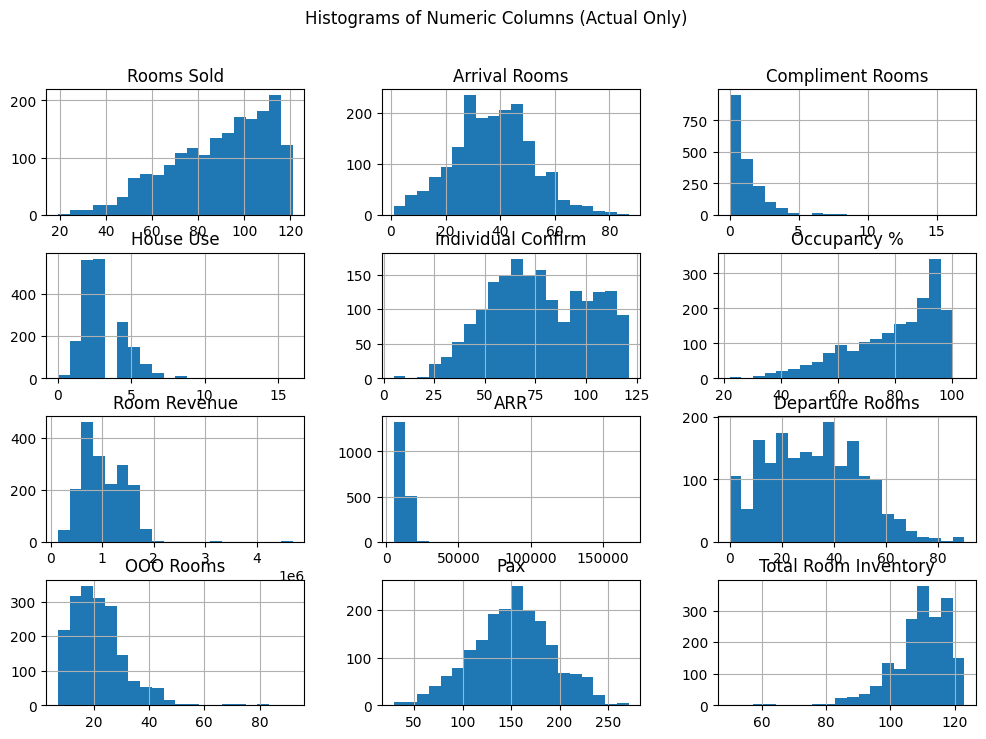

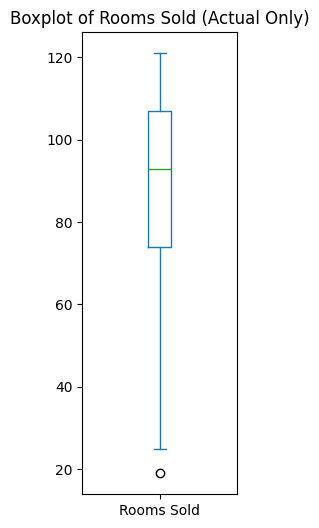

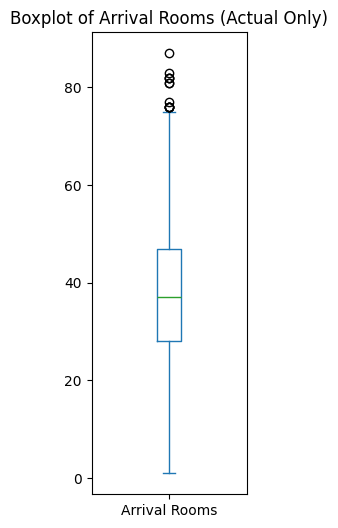

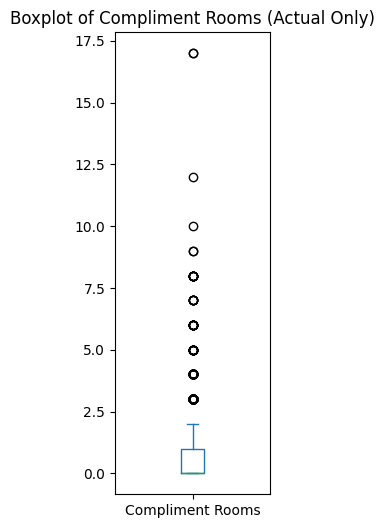

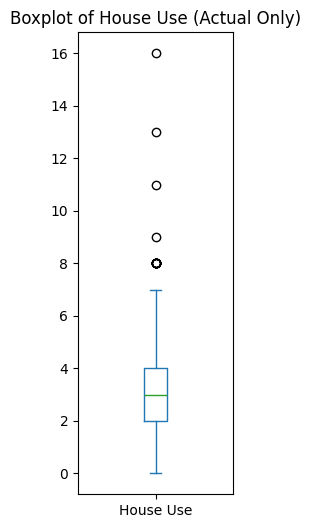

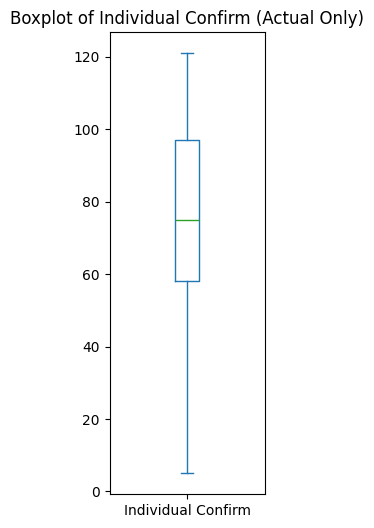

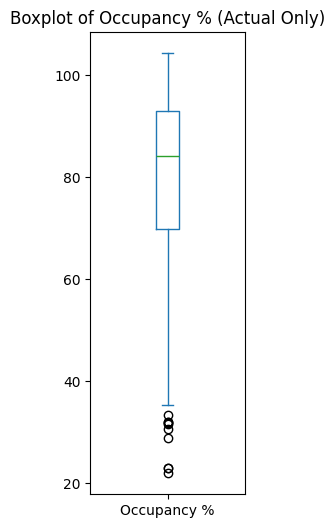

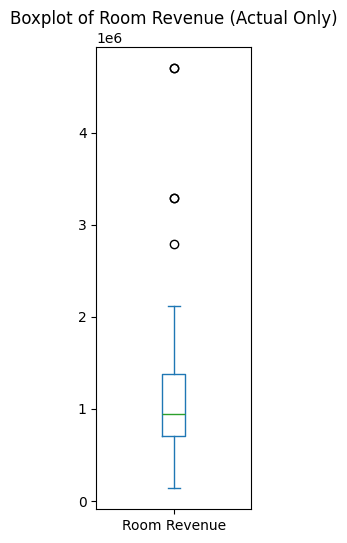

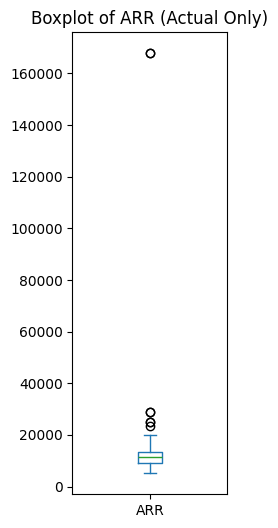

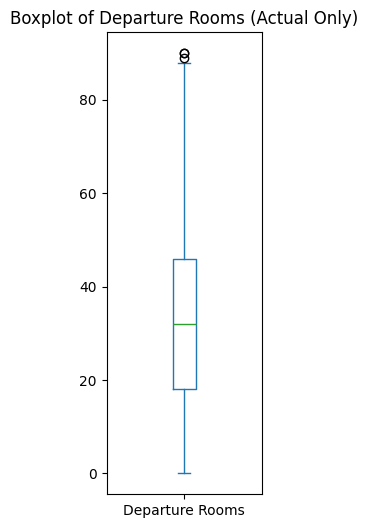

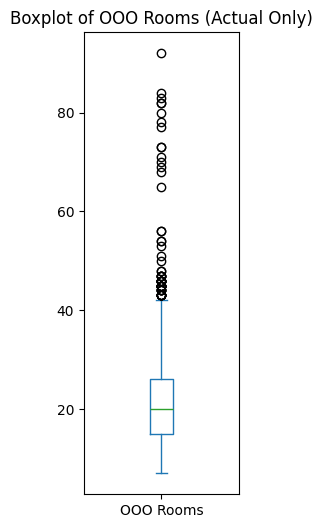

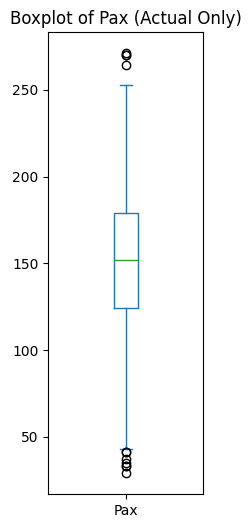

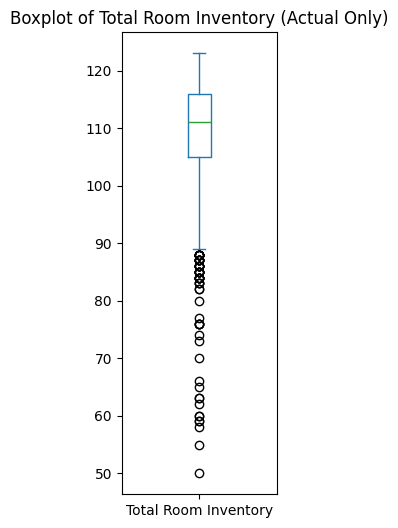

In [ ]:
import matplotlib.pyplot as plt

numeric_cols_actual = df_actual.select_dtypes(include=["int", "float"]).columns

# 5.1. Histogram for numeric columns
df_actual[numeric_cols_actual].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Columns (Actual Only)")
plt.show()

# 5.2. Boxplots
for col in numeric_cols_actual:
    df_actual[col].plot(kind="box", figsize=(2,6))
    plt.title(f"Boxplot of {col} (Actual Only)")
    plt.show()


Correlation matrix (Actual Only):


,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory
Rooms Sold,1.000000,0.573177,0.074048,-0.067900,0.622718,0.954278,0.679552,0.044559,0.169757,-0.708122,0.798322,0.699523
Arrival Rooms,0.573177,1.000000,0.029046,0.040329,0.529899,0.513465,0.297491,-0.058512,0.581043,-0.428979,0.351232,0.448149
Compliment Rooms,0.074048,0.029046,1.000000,-0.073929,-0.043557,0.063379,0.139910,0.067628,-0.109014,-0.117101,0.235067,0.087600
House Use,-0.067900,0.040329,-0.073929,1.000000,0.203284,-0.099082,-0.096500,-0.037983,0.185587,0.081838,-0.224326,-0.086397
Individual Confirm,0.622718,0.529899,-0.043557,0.203284,1.000000,0.576186,0.216442,-0.116833,0.521403,-0.382216,0.195043,0.406805
Occupancy %,0.954278,0.513465,0.063379,-0.099082,0.576186,1.000000,0.633905,0.014536,0.090507,-0.511322,0.765867,0.483536
Room Revenue,0.679552,0.297491,0.139910,-0.096500,0.216442,0.633905,1.000000,0.639537,-0.026118,-0.641025,0.687230,0.595273
ARR,0.044559,-0.058512,0.067628,-0.037983,-0.116833,0.014536,0.639537,1.000000,-0.014870,-0.234601,0.131815,0.199223
Departure Rooms,0.169757,0.581043,-0.109014,0.185587,0.521403,0.090507,-0.026118,-0.014870,1.000000,-0.191870,-0.150822,0.227946
OOO Rooms,-0.708122,-0.428979,-0.117101,0.081838,-0.382216,-0.511322,-0.641025,-0.234601,-0.191870,1.000000,-0.655980,-0.982914


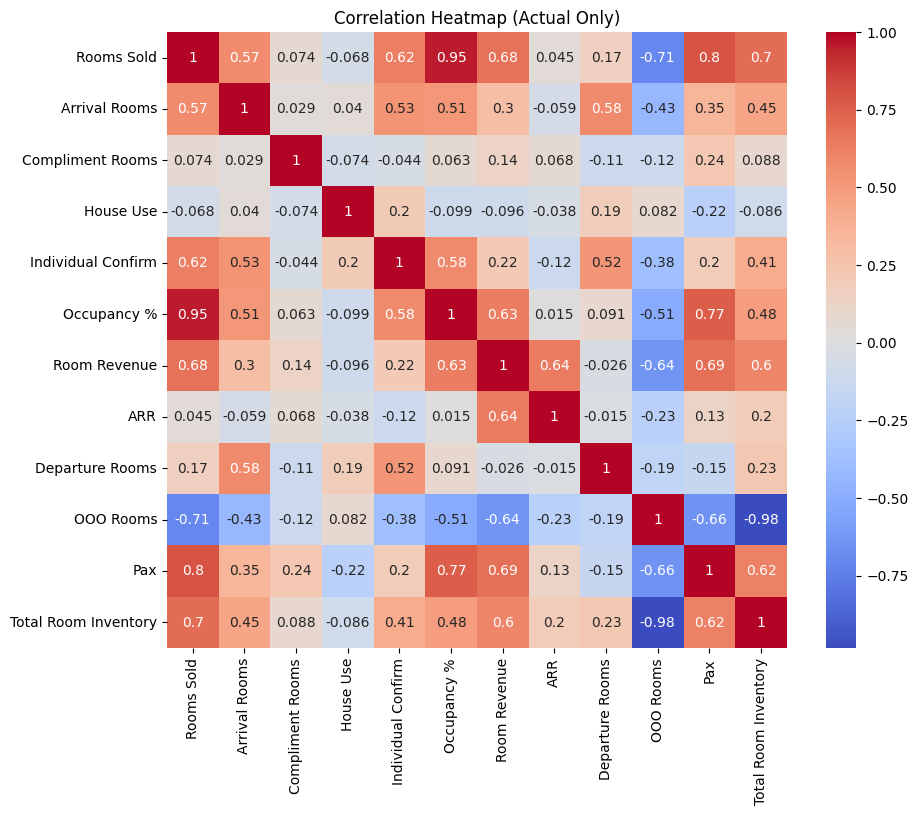

In [ ]:
import numpy as np
import seaborn as sns

corr_actual = df_actual[numeric_cols_actual].corr()
print("Correlation matrix (Actual Only):")
display(corr_actual)

plt.figure(figsize=(10,8))
sns.heatmap(corr_actual, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Actual Only)")
plt.show()


C:\Users\jnami\AppData\Local\Temp\ipykernel_31888\1223284851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual["day_of_week"] = df_actual["arrival_date"].dt.day_name()
C:\Users\jnami\AppData\Local\Temp\ipykernel_31888\1223284851.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual["day_of_week"] = pd.Categorical(df_actual["day_of_week"], categories=dow_order, ordered=True)
C:\Users\jnami\AppData\Local\Temp\ipykernel_31888\1223284851.py:17: FutureWarning: The default of observed=False i

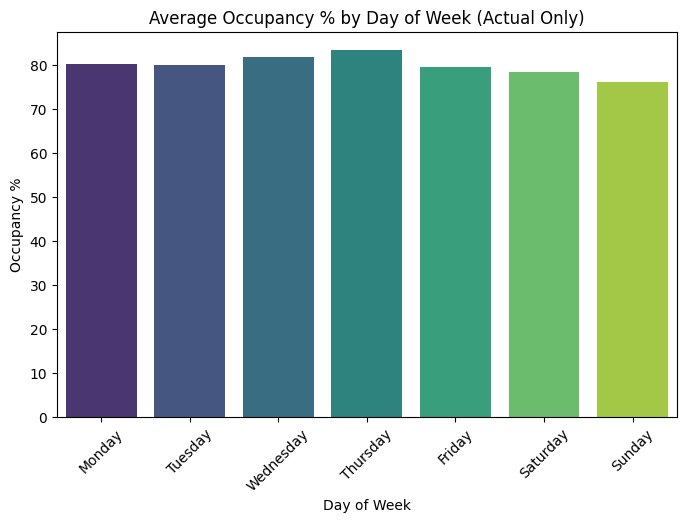

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_actual is already defined with 'arrival_date' as a datetime column

# 1) Create a "day_of_week" column from arrival_date
df_actual["day_of_week"] = df_actual["arrival_date"].dt.day_name()

# 2) To ensure Monday -> Sunday order, convert to an ordered categorical
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df_actual["day_of_week"] = pd.Categorical(df_actual["day_of_week"], categories=dow_order, ordered=True)

# 3) Group by day_of_week and calculate the mean occupancy
df_dow_occ = (
    df_actual
    .groupby("day_of_week", as_index=False)["Occupancy %"]
    .mean()
    .dropna()
)

# 4) Plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=df_dow_occ, x="day_of_week", y="Occupancy %", order=dow_order, palette="viridis")

# 5) Formatting
plt.title("Average Occupancy % by Day of Week (Actual Only)")
plt.xlabel("Day of Week")
plt.ylabel("Occupancy %")
plt.xticks(rotation=45)  # Rotating labels for readability
plt.show()


C:\Users\jnami\AppData\Local\Temp\ipykernel_31888\1504491244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['arrival_month'] = df_actual['arrival_date'].dt.to_period("M")


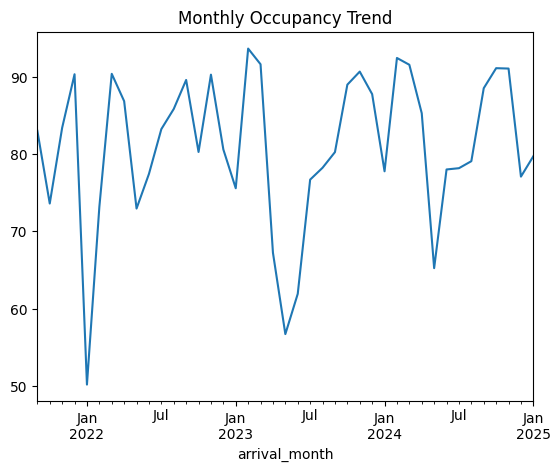

In [ ]:
df_actual['arrival_month'] = df_actual['arrival_date'].dt.to_period("M")
monthly_occ = df_actual.groupby('arrival_month')['Occupancy %'].mean()
monthly_occ.plot(kind='line')
plt.title("Monthly Occupancy Trend")
plt.show()

In [ ]:
# Find duplicate dates
duplicate_dates = df_actual["Date"].duplicated(keep=False)

# Show rows with duplicate dates
df_actual[duplicate_dates]


,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast,day_of_week,arrival_month
0,2023-02-01 00:00:00,Wednesday,116.0,37.0,0.0,2.0,118.0,97.48,1525371.79,13149.76,33.0,11.0,155.0,119.0,2023-02-01,2023-02-01,actual,Wednesday,2023-02
1,2023-02-02 00:00:00,Thursday,115.0,29.0,0.0,3.0,118.0,95.83,1448656.84,12597.02,29.0,10.0,159.0,120.0,2023-02-02,2023-02-02,actual,Thursday,2023-02
2,2023-02-03 00:00:00,Friday,117.0,36.0,0.0,2.0,119.0,97.50,1532358.27,13097.08,35.0,10.0,173.0,120.0,2023-02-03,2023-02-03,actual,Friday,2023-02
3,2023-02-04 00:00:00,Saturday,117.0,60.0,2.0,2.0,121.0,96.69,1526782.32,13049.42,60.0,9.0,189.0,121.0,2023-02-04,2023-02-04,actual,Saturday,2023-02
4,2023-02-05 00:00:00,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-05,2023-02-05,actual,Sunday,2023-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125360,2023-10-21 00:00:00,Saturday,100.0,44.0,1.0,3.0,104.0,89.29,1491531.14,14915.31,33.0,18.0,149.0,112.0,2023-10-21,2023-10-21,actual,Saturday,2023-10
125361,2023-10-22 00:00:00,Sunday,92.0,39.0,1.0,3.0,96.0,84.40,1424739.24,15486.30,49.0,21.0,153.0,109.0,2023-10-22,2023-10-22,actual,Sunday,2023-10
125362,2023-10-23 00:00:00,Monday,90.0,33.0,0.0,3.0,93.0,80.36,1207595.55,13417.73,36.0,18.0,141.0,112.0,2023-10-23,2023-10-23,actual,Monday,2023-10
125363,2023-10-24 00:00:00,Tuesday,101.0,45.0,0.0,2.0,103.0,87.83,1336085.33,13228.57,37.0,15.0,156.0,115.0,2023-10-24,2023-10-24,actual,Tuesday,2023-10


In [ ]:
print(df_actual.columns)


Index(['Date', 'Day', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms',
       'House Use', 'Individual Confirm', 'Occupancy %', 'Room Revenue', 'ARR',
       'Departure Rooms', 'OOO Rooms', 'Pax', 'Total Room Inventory',
       'snapshot_date', 'arrival_date', 'actual_or_forecast', 'day_of_week',
       'arrival_month'],
      dtype='object')


In [ ]:
df_actual = df_actual.copy()
df_actual["Date"] = pd.to_datetime(df_actual["Date"], errors="coerce")
df_actual.dropna(subset=["Date"], inplace=True)

# Sort by Date
df_actual.sort_values("Date", inplace=True)

# Drop duplicates by Date (keeping the first occurrence)
df_actual.drop_duplicates(subset="Date", keep="first", inplace=True)


In [ ]:
print(df_actual.columns)


Index(['Date', 'Day', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms',
       'House Use', 'Individual Confirm', 'Occupancy %', 'Room Revenue', 'ARR',
       'Departure Rooms', 'OOO Rooms', 'Pax', 'Total Room Inventory',
       'snapshot_date', 'arrival_date', 'actual_or_forecast', 'day_of_week',
       'arrival_month'],
      dtype='object')


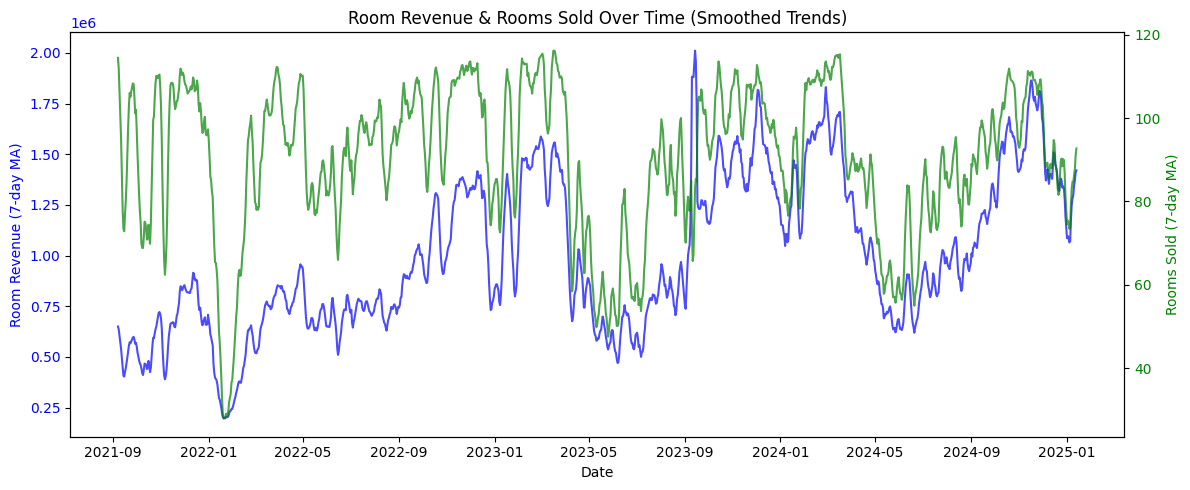

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Handling: Use Log Transformation (Instead of Hard Capping)
df_actual["Room Revenue Log"] = np.log1p(df_actual["Room Revenue"])
df_actual["ARR Log"] = np.log1p(df_actual["ARR"])

# Scaling Data for Balanced Dual Y-Axis
df_actual["Revenue Scaled"] = df_actual["Room Revenue"] / df_actual["Room Revenue"].max()
df_actual["Rooms Sold Scaled"] = df_actual["Rooms Sold"] / df_actual["Rooms Sold"].max()

# Apply Rolling Average (7-day Moving Average) for Smoother Trends
df_actual["Rooms Sold MA"] = df_actual["Rooms Sold"].rolling(7).mean()
df_actual["Room Revenue MA"] = df_actual["Room Revenue"].rolling(7).mean()

# Plot with Dual Y-Axis and Smoothed Data
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Room Revenue with Moving Average
ax1.plot(df_actual["Date"], df_actual["Room Revenue MA"], label="Room Revenue (7-day MA)", color="blue", alpha=0.7)
ax1.set_xlabel("Date")
ax1.set_ylabel("Room Revenue (7-day MA)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Secondary axis for Rooms Sold with Moving Average
ax2 = ax1.twinx()
ax2.plot(df_actual["Date"], df_actual["Rooms Sold MA"], label="Rooms Sold (7-day MA)", color="green", alpha=0.7)
ax2.set_ylabel("Rooms Sold (7-day MA)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

plt.title("Room Revenue & Rooms Sold Over Time (Smoothed Trends)")
fig.tight_layout()
plt.show()


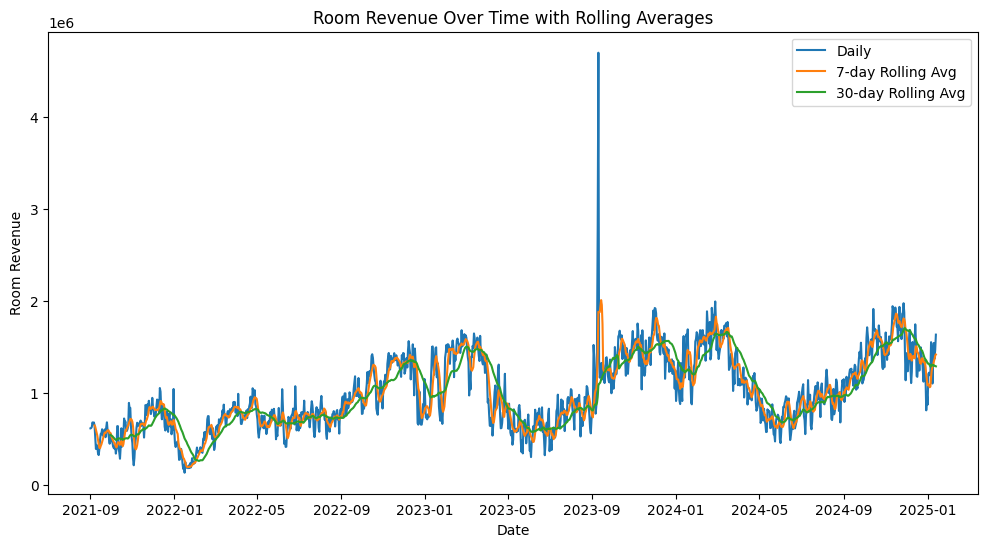

In [ ]:
df_actual["Room Revenue 7D"] = df_actual["Room Revenue"].rolling(7).mean()
df_actual["Room Revenue 30D"] = df_actual["Room Revenue"].rolling(30).mean()

# Plot all three lines (daily, 7-day, 30-day) on one figure
plt.figure(figsize=(12, 6))
plt.plot(df_actual["arrival_date"], df_actual["Room Revenue"], label="Daily")
plt.plot(df_actual["arrival_date"], df_actual["Room Revenue 7D"], label="7-day Rolling Avg")
plt.plot(df_actual["arrival_date"], df_actual["Room Revenue 30D"], label="30-day Rolling Avg")
plt.title("Room Revenue Over Time with Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Room Revenue")
plt.legend()
plt.show()

### Analysis of ACF
- Our plot is decaying slowly, showing strong presence of autoregressive process (AR).
- This pattern is common in non-stationary time series, meaning the data might need differencing to achieve stationarity before modeling.

### Analysis of PACF
- The PACF cuts off after lag 2, with only the first lag being significant.
- This suggests that an AR(2) process might be appropriate for modeling this data.

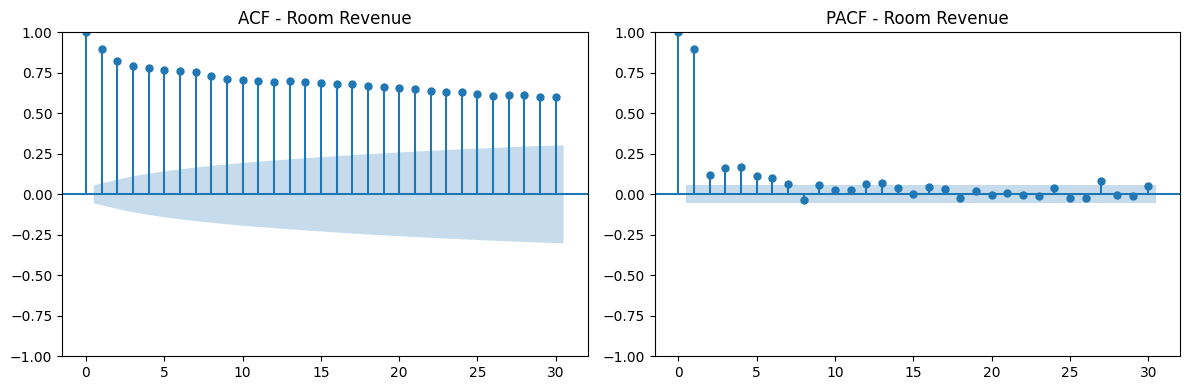

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_actual['Room Revenue'].dropna(), ax=ax[0], lags=30)
ax[0].set_title('ACF - Room Revenue')

# Partial Autocorrelation
plot_pacf(df_actual['Room Revenue'].dropna(), ax=ax[1], lags=30, method='ywm')
ax[1].set_title('PACF - Room Revenue')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Suppose your DataFrame is df_1, indexed by Date
# and "Room Revenue" is the series to check.
series = df_actual['Room Revenue'].dropna()  # ensure no NaNs

# Perform the ADF test
adf_result = adfuller(series, autolag='AIC')

# Extract results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}, {value}')


ADF Statistic: -2.856460794097719
p-value: 0.0506503351711566
Critical Values:
   1%, -3.435730242325657
   5%, -2.863915864680021
   10%, -2.5680349476516726


In [ ]:
df_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1156 non-null   datetime64[ns]
 1   Day                   1156 non-null   object        
 2   Rooms Sold            1156 non-null   float64       
 3   Arrival Rooms         1156 non-null   float64       
 4   Compliment Rooms      1156 non-null   float64       
 5   House Use             1156 non-null   float64       
 6   Individual Confirm    1156 non-null   float64       
 7   Occupancy %           1156 non-null   float64       
 8   Room Revenue          1156 non-null   float64       
 9   ARR                   1156 non-null   float64       
 10  Departure Rooms       1156 non-null   float64       
 11  OOO Rooms             1156 non-null   float64       
 12  Pax                   1156 non-null   float64       
 13  Total Room Invento

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow as tf

# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.preprocessing import StandardScaler

# # ---------------------------
# # 1. Data Preprocessing (Assumed done already)
# # ---------------------------
# # Assume X_train_scaled, X_test_scaled, y_train, y_test are prepared as in your previous code.
# # Here, y_train and y_test should be continuous revenue values.

# print("Shape of X_train_scaled:", X_train_scaled.shape)
# print("Shape of y_train:", y_train.shape)

# # ---------------------------
# # 2. Build Model with Keras Tuner for Regression
# # ---------------------------
# import keras_tuner as kt

# def model_builder(hp):
#     model = tf.keras.models.Sequential()
#     # Tune the number of units in the LSTM layer: 50 or 100.
#     units = hp.Choice('units', values=[50, 100])
#     # Tune the dropout rate: 0.2 or 0.3.
#     dropout_rate = hp.Choice('dropout_rate', values=[0.2, 0.3])
#     # Tune the optimizer: adam or rmsprop.
#     optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    
#     model.add(tf.keras.layers.LSTM(units, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
#     model.add(tf.keras.layers.Dropout(dropout_rate))
#     # For regression, the output layer uses linear activation.
#     model.add(tf.keras.layers.Dense(1, activation='linear'))
    
#     model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
#     return model

# # Create a tuner: using RandomSearch; objective is to minimize the validation loss (MSE)
# tuner = kt.RandomSearch(model_builder,
#                         objective='val_loss',
#                         max_trials=10,
#                         executions_per_trial=1,
#                         directory='lstm_tuner_dir',
#                         project_name='lstm_revenue_regression')

# # Perform the hyperparameter search.
# tuner.search(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2)

# # Retrieve the best hyperparameters.
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print("Best hyperparameters:")
# print("Units:", best_hps.get('units'))
# print("Dropout Rate:", best_hps.get('dropout_rate'))
# print("Optimizer:", best_hps.get('optimizer'))

# # ---------------------------
# # 3. Train the Final Model Using the Best Hyperparameters
# # ---------------------------
# model = tuner.hypermodel.build(best_hps)

# # Use EarlyStopping for a better training routine.
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Set epochs to a fixed value, e.g., 50
# history = model.fit(X_train_scaled, y_train, 
#                     epochs=50, 
#                     batch_size=16, 
#                     validation_split=0.2,
#                     callbacks=[early_stop],
#                     verbose=1)

# # ---------------------------
# # 4. Evaluate the Model
# # ---------------------------
# # Evaluate on test set and compute regression metrics.
# test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
# print("Test MSE (Loss): {:.4f}".format(test_loss))
# print("Test MAE: {:.4f}".format(test_mae))

# # Generate predictions on test set.
# y_pred = model.predict(X_test_scaled)

# # Calculate additional metrics (if desired).
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Squared Error (MSE): {:.4f}".format(mse))
# print("Mean Absolute Error (MAE): {:.4f}".format(mae))

# # ---------------------------
# # 5. Plot Training History
# # ---------------------------
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Train MSE Loss')
# plt.plot(history.history['val_loss'], label='Val MSE Loss')
# plt.title("Training and Validation MSE Loss")
# plt.xlabel("Epoch")
# plt.ylabel("MSE Loss")
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['mean_absolute_error'], label='Train MAE')
# plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
# plt.title("Training and Validation MAE")
# plt.xlabel("Epoch")
# plt.ylabel("MAE")
# plt.legend()
# plt.tight_layout()
# plt.show()

# # ---------------------------
# # 6. Save the Final Model
# # ---------------------------
# model_path = 'lstm_revenue_model_regression.h5'
# model.save(model_path)
# print("Model saved to:", model_path)

# # ---------------------------
# # 7. Load the Model and Predict on New Data
# # ---------------------------
# loaded_model = tf.keras.models.load_model(model_path)
# print("Model loaded.")

# # Assume sample_sequence is your new data sequence of shape (1, window_size, n_features)
# sample_sequence = X_test[[-1]]  # For demonstration, taking last sequence from test set.
# # Scale sample_sequence similarly (assuming same scaler used before).
# n_features = sample_sequence.shape[2]
# sample_reshaped = sample_sequence.reshape(-1, n_features)
# scaler_instance = StandardScaler()
# scaler_instance.fit(X_train.reshape(-1, n_features))
# sample_scaled = scaler_instance.transform(sample_reshaped).reshape(1, sample_sequence.shape[1], n_features)

# predicted_revenue = loaded_model.predict(sample_scaled)
# print("Predicted revenue:", predicted_revenue[0][0])


In [ ]:
duplicate_dates = df_models["Date"].duplicated(keep=False)
df_models[duplicate_dates]
df_test=df_models[duplicate_dates]
df_test.to_csv("duplicate_dates.csv")

# 2.1. Count missing (NaN) values in each column
# missing_counts1 = df_models.isna().sum()
# display(missing_counts1)
# 7
# # (Optional) Check the percentage of missing values
# missing_percentage = (df_models.isna().mean() * 100).round(2)
# display(missing_percentage)

# # 3.1. Check for duplicate rows
# duplicate_rows = df_models.duplicated().sum()
# print("Number of duplicate rows:", duplicate_rows)


PermissionError: [Errno 13] Permission denied: 'duplicate_dates.csv'

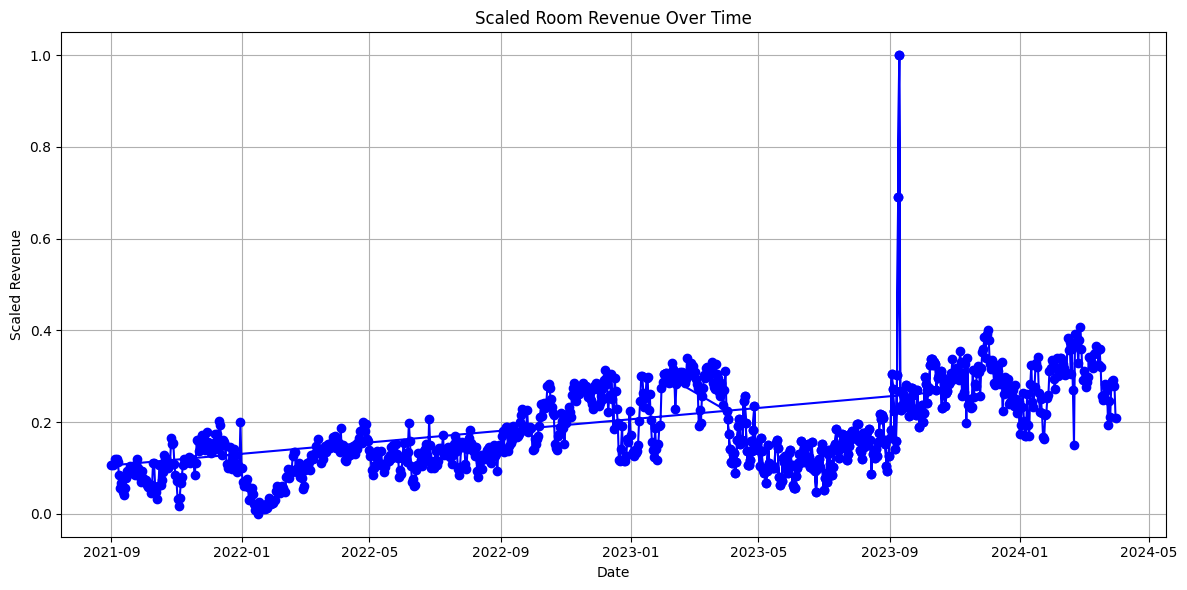

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assume 'df' is your DataFrame containing the data.
# Convert 'Date' to datetime if not already done (optional if already in datetime format)
df_new1=df_models.copy()
# df_new1['Date'] = pd.to_datetime(df_new1['Date'])

# Scale the 'Room Revenue' column using min-max normalization
# df_new1['Scaled Revenue'] = (df_new1['Room Revenue'] - df_new1['Room Revenue'].min()) / (df_new1['Room Revenue'].max() - df_new1['Room Revenue'].min())
scaler = MinMaxScaler()

# Fit the scaler on the 'Room Revenue' column and transform it
df_new1['Scaled Revenue'] = scaler.fit_transform(df_new1[['Room Revenue']])
# Plot the scaled revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df_new1['Date'], df_new1['Scaled Revenue'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Scaled Revenue')
plt.title('Scaled Room Revenue Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


Minimun room revenue: 136045
Maximum room revenue: 4698585


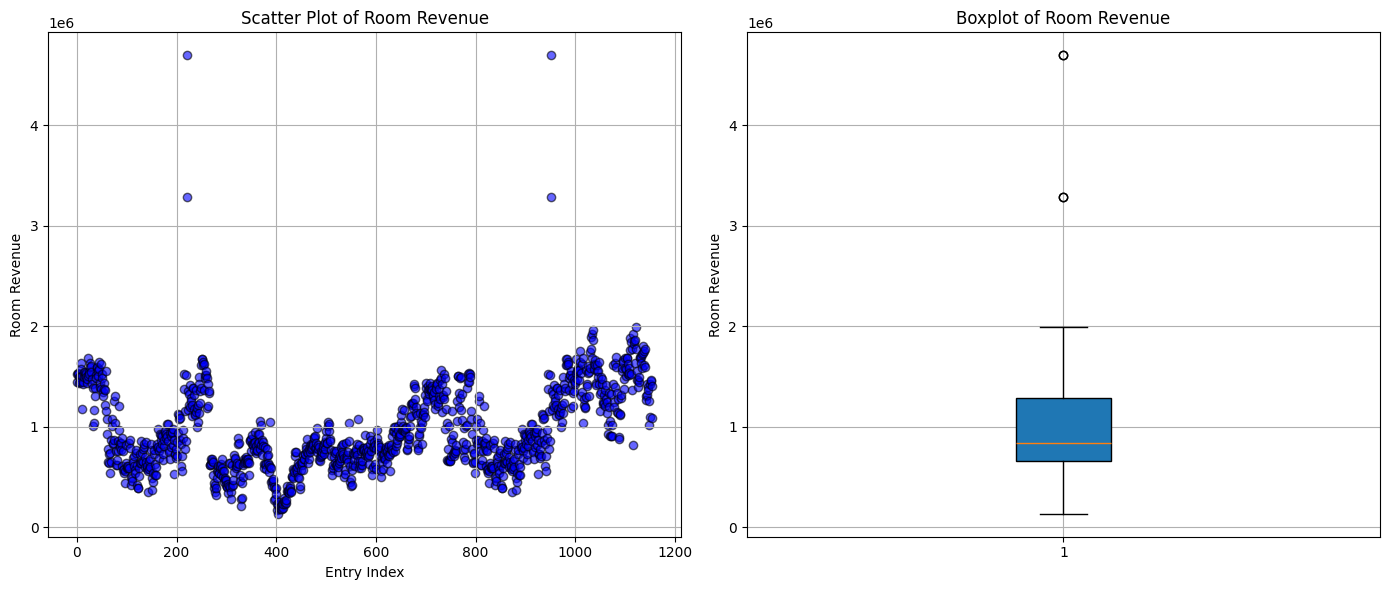

Removed 4 outliers out of 1156 entries.
Cleaned Minimun room revenue: 136045
Cleaned Maximum room revenue: 1996523


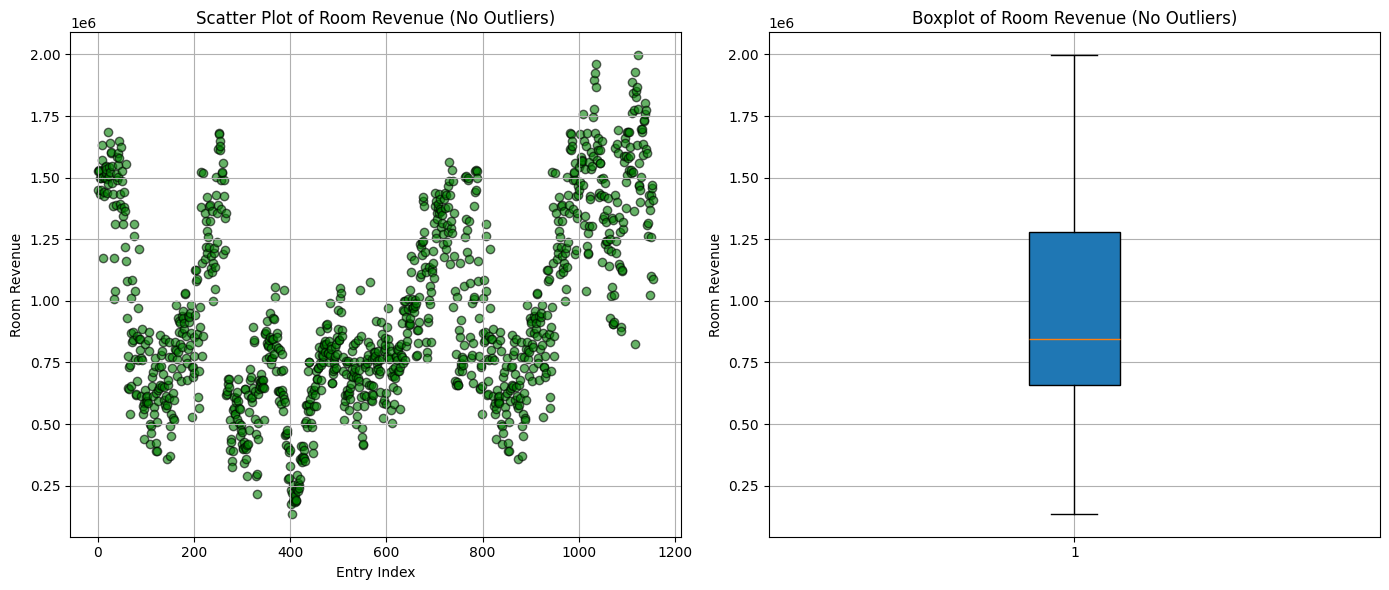

In [ ]:
import pandas as pd

# Assume 'df' is your DataFrame containing the data
# df['Date'] = pd.to_datetime(df['Date'])
df_new2=df_models.copy()
df_new2['Room Revenue'] = df_new2['Room Revenue'].astype(int)

print("Minimun room revenue: " + str(df_new2['Room Revenue'].min()))
print("Maximum room revenue: " + str(df_new2['Room Revenue'].max()))


#PLotting the data to check for outliers
plt.figure(figsize=(14, 6))

# Scatter plot: entry index vs. Room Revenue
plt.subplot(1, 2, 1)
plt.scatter(df_new2.index, df_new2['Room Revenue'], alpha=0.6, color='blue', edgecolor='k')
plt.xlabel('Entry Index')
plt.ylabel('Room Revenue')
plt.title('Scatter Plot of Room Revenue')
plt.grid(True)

# Boxplot: visualize distribution and potential outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_new2['Room Revenue'], vert=True, patch_artist=True)
plt.ylabel('Room Revenue')
plt.title('Boxplot of Room Revenue')
plt.grid(True)

plt.tight_layout()
plt.show()




# Outlier Removal



# Calculate the first and third quartiles and the IQR
Q1 = df_new2['Room Revenue'].quantile(0.25)
Q3 = df_new2['Room Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df_new2[(df_new2['Room Revenue'] >= lower_bound) & (df_new2['Room Revenue'] <= upper_bound)]

# Optional: Print the number of outliers removed
num_removed = len(df_new2) - len(df_no_outliers)
print(f"Removed {num_removed} outliers out of {len(df_new2)} entries.")




print("Cleaned Minimun room revenue: " + str(df_no_outliers['Room Revenue'].min()))
print("Cleaned Maximum room revenue: " + str(df_no_outliers['Room Revenue'].max()))

cleaned_min = df_no_outliers['Room Revenue'].min()
cleaned_max = df_no_outliers['Room Revenue'].max()
# Plot the cleaned data

plt.figure(figsize=(14, 6))

# Scatter Plot: Entry index vs. Room Revenue without outliers
plt.subplot(1, 2, 1)
plt.scatter(df_no_outliers.index, df_no_outliers['Room Revenue'], alpha=0.6, color='green', edgecolor='k')
plt.xlabel('Entry Index')
plt.ylabel('Room Revenue')
plt.title('Scatter Plot of Room Revenue (No Outliers)')
plt.grid(True)

# Boxplot: Distribution of Room Revenue without outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers['Room Revenue'], vert=True, patch_artist=True)
plt.ylabel('Room Revenue')
plt.title('Boxplot of Room Revenue (No Outliers)')
plt.grid(True)

plt.tight_layout()
plt.show()






# Define custom bins based on your revenue data. 
# These are example boundaries. Adjust these numbers based on your data distribution.
# bins = [df_new2['Room Revenue'].min(), 1000, 5000, 10000, 20000, df_new2['Room Revenue'].max()]

# # Define labels for each range. These can be placeholders until you decide on the final scaling.
# labels = ['Range1', 'Range2', 'Range3', 'Range4', 'Range5']

# # Use pd.cut to segment the 'Room Revenue' into the defined bins
# df_new2['Revenue Range'] = pd.cut(df_new2['Room Revenue'], bins=bins, labels=labels, include_lowest=True)

# # Print the count of points in each range
# range_counts = df_new2['Revenue Range'].value_counts().sort_index()
# print("Number of data points in each revenue range:")
# print(range_counts)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Number of data points in each revenue bin:
Revenue Bin
1-2 Lakh        7
2-3 Lakh       19
3-4 Lakh       28
4-5 Lakh       48
5-6 Lakh       91
6-7 Lakh      143
7-8 Lakh      167
8-9 Lakh      134
9-10 Lakh      76
10-11 Lakh     51
11-12 Lakh     57
12-13 Lakh     50
13-14 Lakh     75
14-15 Lakh     69
15-16 Lakh     69
16-17 Lakh     46
17-18 Lakh     10
18-19 Lakh      8
19-20 Lakh      4
Name: count, dtype: int64

Sample data with new whole number labels:
   Room Revenue Revenue Bin  Revenue Whole (FloorDiv)  \
0       1525371  15-16 Lakh                        15   
1       1448656  14-15 Lakh                        14   
2       1532358  15-16 Lakh                        15   
3       1526782  15-16 Lakh                        15   
4       1499626  14-15 Lakh                        14   

  Revenue Whole (From Label)  
0                         15  
1                         14  
2                         15  

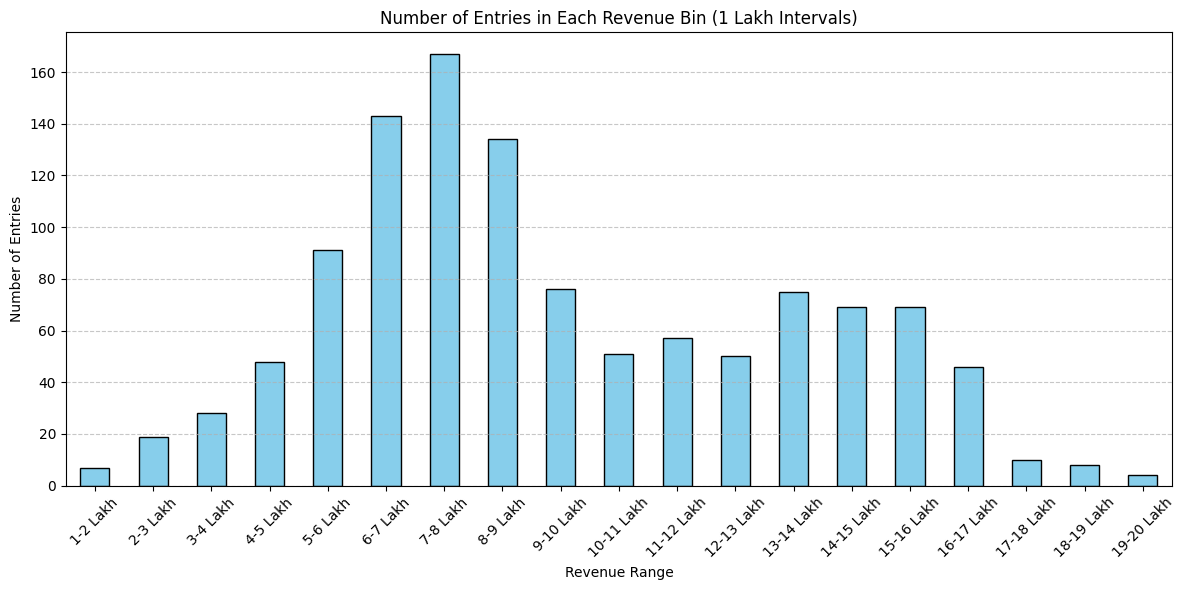

In [ ]:
# Define revenue bins in steps of 1 lakh.
# We'll start from 100,000 (1 Lakh) to a value above the max.
start_bin = 100000
end_bin = ((cleaned_max // 100000) + 1) * 100000  # round up to next 1 lakh
bins = np.arange(start_bin, end_bin + 1, 100000)    # create bin edges
labels = [f"{i}-{i+1} Lakh" for i in range(start_bin // 100000, end_bin // 100000)]

# Use pd.cut to segment the 'Room Revenue' into these custom bins
df_new2['Revenue Bin'] = pd.cut(df_new2['Room Revenue'], bins=bins, labels=labels, include_lowest=True)

df_new2['Revenue Whole (FloorDiv)'] = df_new2['Room Revenue'] // 100000

# --- Method 2: Extracting from the bin label ---
# For each row, split the bin string (e.g., "15-16 Lakh") and take the lower bound as an integer.
def extract_lower(bin_label):
    if pd.notnull(bin_label):
        return int(bin_label.split('-')[0])
    else:
        return np.nan

labels2 = [i for i in range(start_bin // 100000, end_bin // 100000)]
print(labels2)

df_new2['Revenue Whole (From Label)'] = df_new2['Revenue Bin'].apply(extract_lower)

# Print the count of points in each revenue bin
bin_counts = df_new2['Revenue Bin'].value_counts().sort_index()
print("Number of data points in each revenue bin:")
print(bin_counts)

# Display the first few rows to compare the new whole number labels
print("\nSample data with new whole number labels:")
print(df_new2[['Room Revenue', 'Revenue Bin', 'Revenue Whole (FloorDiv)', 'Revenue Whole (From Label)']].head())

# Plot a bar chart of the revenue bin counts
plt.figure(figsize=(12, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Revenue Range')
plt.ylabel('Number of Entries')
plt.title('Number of Entries in Each Revenue Bin (1 Lakh Intervals)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()